In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

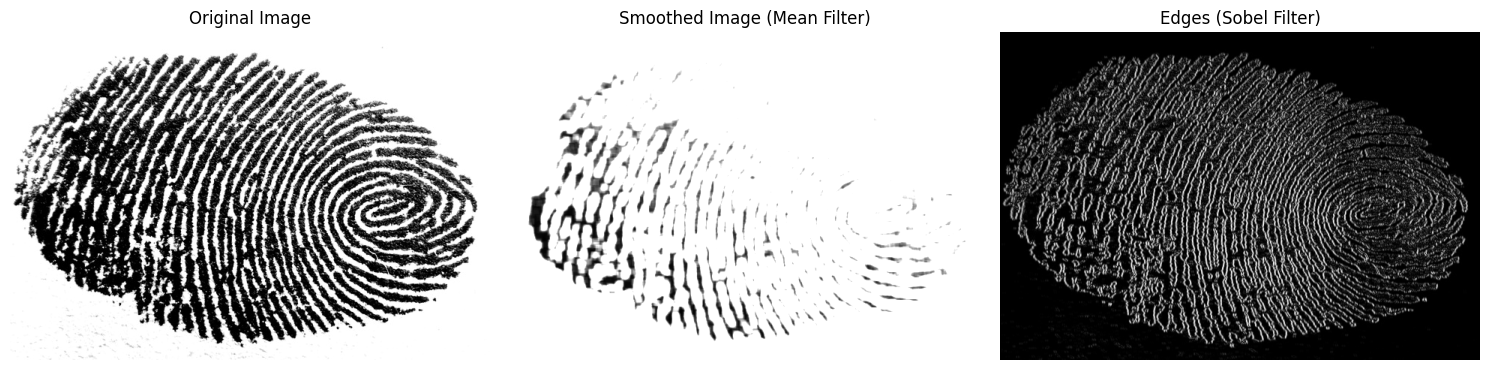

In [ ]:
# Load a grayscale image
image = cv2.imread('../images/fingerprint.jpg', cv2.IMREAD_GRAYSCALE)

# Apply a 3x3 Mean Filter (Smoothing)
kernel_mean = np.ones((3, 3), np.float32) / 9
smoothed_image = cv2.filter2D(image, -1, kernel_mean)

# Apply Sobel Filter for edge detection (horizontal edges)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)

# Display the results
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Smoothed Image (Mean Filter)')
plt.imshow(smoothed_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Edges (Sobel Filter)')
plt.imshow(np.abs(sobel_x), cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


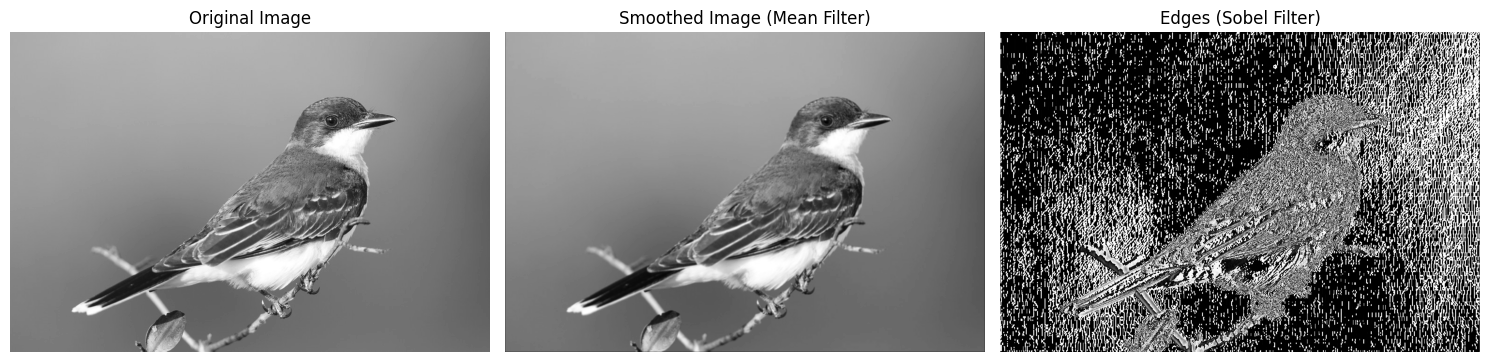

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load image as a grayscale numpy array
image = Image.open('bird.jpg').convert('L')
image_array = np.array(image)

# Define a function for applying a filter manually
def apply_filter(image, kernel):
    # Get dimensions
    img_height, img_width = image.shape
    kernel_size = kernel.shape[0]
    pad = kernel_size // 2  # Padding size
    output = np.zeros_like(image)  # Create an output array
    
    # Pad the image with zeros to handle edges
    padded_image = np.pad(image, pad, mode='constant', constant_values=0)
    
    # Apply filter
    for i in range(img_height):
        for j in range(img_width):
            # Extract the region of interest
            region = padded_image[i:i+kernel_size, j:j+kernel_size]
            # Perform element-wise multiplication and sum
            output[i, j] = np.sum(region * kernel)
    
    return output

# Mean filter (3x3)
mean_kernel = np.ones((3, 3)) / 9

# Sobel filter for horizontal edges (3x3)
sobel_x_kernel = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

# Apply the filters
smoothed_image = apply_filter(image_array, mean_kernel)
edge_image = apply_filter(image_array, sobel_x_kernel)

# Display the results
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Smoothed Image (Mean Filter)')
plt.imshow(smoothed_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Edges (Sobel Filter)')
plt.imshow(np.abs(edge_image), cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
